# Perceptron
Notice `Linear` that happened to show in task

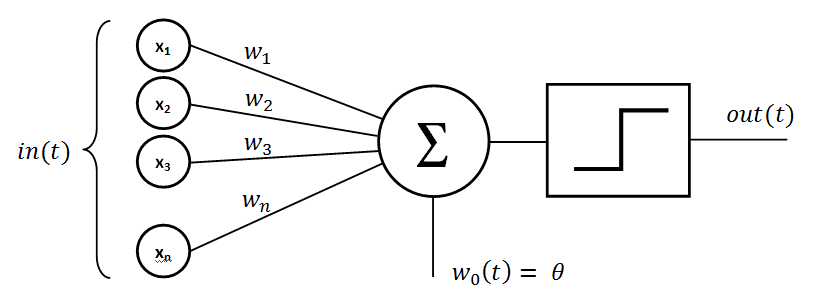

### Create a Perceptron (See task answer)

# Circles Classification Problem

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

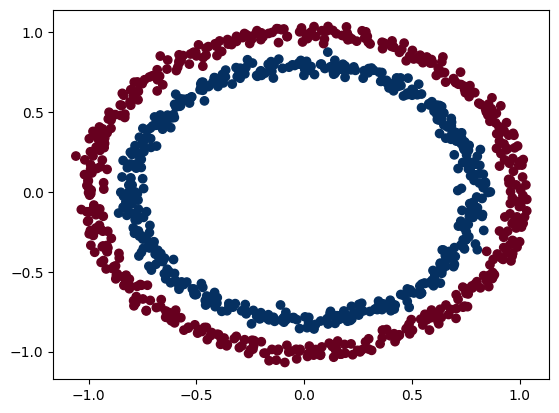

In [4]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [5]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train Shape: {X_train.shape} | Test Shape: {X_test.shape}")


Train Shape: torch.Size([800, 2]) | Test Shape: torch.Size([200, 2])


In [6]:
print(f"Data Point: {X_train[0]}")

Data Point: tensor([ 0.4784, -0.8509])


# Activation Function

### Go [Here](https://playground.tensorflow.org/)

In [7]:
import torch.nn as nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return torch.squeeze(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x))))))

In [8]:
model: nn.Module = CircleModel()
print(model)

CircleModel(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [9]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
CircleModel                              --
├─Linear: 1-1                            30
├─Linear: 1-2                            110
├─Linear: 1-3                            11
├─ReLU: 1-4                              --
Total params: 151
Trainable params: 151
Non-trainable params: 0

In [10]:
import torch.optim as optim
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
print(f"Model: {model.state_dict()}")

Model: OrderedDict([('fc1.weight', tensor([[ 0.3789, -0.2734],
        [-0.6872, -0.2828],
        [ 0.0685, -0.0337],
        [-0.5617, -0.1216],
        [-0.1202,  0.1688],
        [-0.4710,  0.6389],
        [ 0.5272,  0.6211],
        [-0.1664,  0.1781],
        [ 0.5721, -0.7013],
        [-0.2797,  0.4646]])), ('fc1.bias', tensor([ 0.2939, -0.7060,  0.4364, -0.0983, -0.6711,  0.4739,  0.2074, -0.3239,
        -0.2978,  0.4776])), ('fc2.weight', tensor([[ 0.1829,  0.2888,  0.0945, -0.0416,  0.2254, -0.3127, -0.0217, -0.2261,
          0.1233,  0.0935],
        [-0.1269, -0.0620, -0.2151, -0.2247, -0.2892, -0.3066, -0.0979, -0.0913,
         -0.2783,  0.0570],
        [ 0.0479,  0.1375, -0.1310,  0.1751,  0.1817,  0.1609, -0.0866, -0.2025,
          0.1385, -0.0629],
        [-0.0795, -0.1187,  0.1495, -0.2790,  0.2677, -0.2510,  0.1705, -0.0382,
          0.3102, -0.1719],
        [-0.0621,  0.0157,  0.3041, -0.1179,  0.1714,  0.0518,  0.0695, -0.0912,
         -0.0531, -0.2175],


In [12]:
from helper_functions import plot_decision_boundary

def plot_boundaries(
    model: nn.Module,
    train_data: torch.Tensor = X_train,
    train_labels: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_labels: torch.Tensor = y_test,
    ):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, train_data, train_labels)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, test_data, test_labels)

def train(
        model: nn.Module,
        loss_function: nn.Module = loss_function,
        optimizer: optim.Optimizer = optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(num_epochs):
        model.train()

        y_preds = model(train_data)

        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

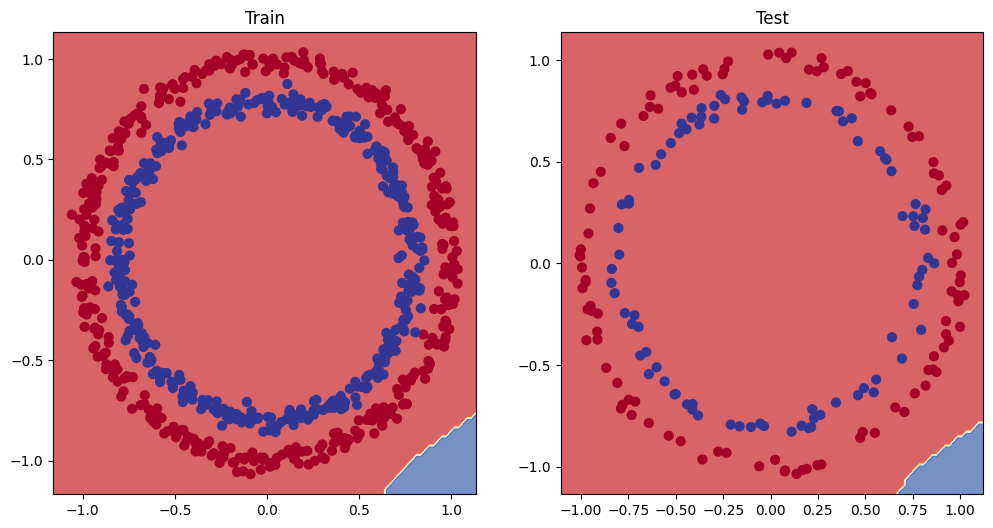

In [13]:
plot_boundaries(model)

In [14]:
epochs_count, train_loss, test_loss = train(model, num_epochs=1000)

Epoch 0: train loss 0.7010343670845032, test loss 0.6906082630157471
Epoch 10: train loss 0.6983687877655029, test loss 0.690996527671814
Epoch 20: train loss 0.6958505511283875, test loss 0.6916710734367371
Epoch 30: train loss 0.6941540241241455, test loss 0.6925708651542664
Epoch 40: train loss 0.6929304599761963, test loss 0.693148136138916
Epoch 50: train loss 0.6917552351951599, test loss 0.6930897235870361
Epoch 60: train loss 0.6906378865242004, test loss 0.6926436424255371
Epoch 70: train loss 0.6895354986190796, test loss 0.6918796300888062
Epoch 80: train loss 0.6883872151374817, test loss 0.6908384561538696
Epoch 90: train loss 0.6870975494384766, test loss 0.6896357536315918
Epoch 100: train loss 0.6856182217597961, test loss 0.6883160471916199
Epoch 110: train loss 0.6838754415512085, test loss 0.686733067035675
Epoch 120: train loss 0.6817123293876648, test loss 0.6848199367523193
Epoch 130: train loss 0.6793429851531982, test loss 0.6823716759681702
Epoch 140: train los

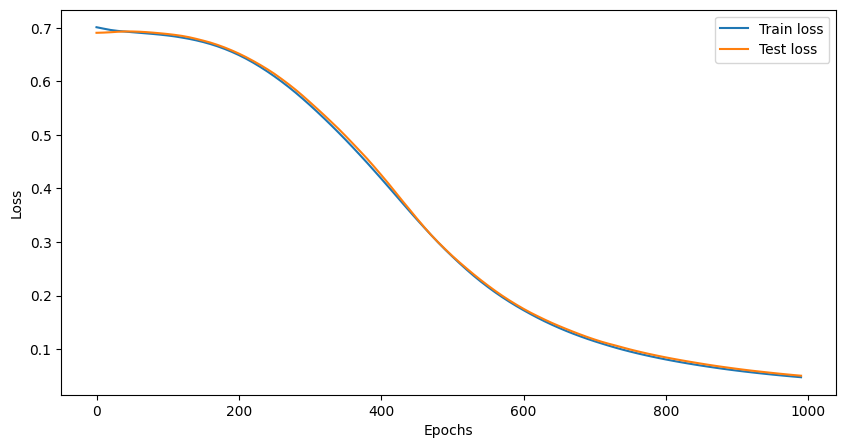

In [15]:
plot_stats(epochs=epochs_count, train_loss=train_loss, test_loss=test_loss)


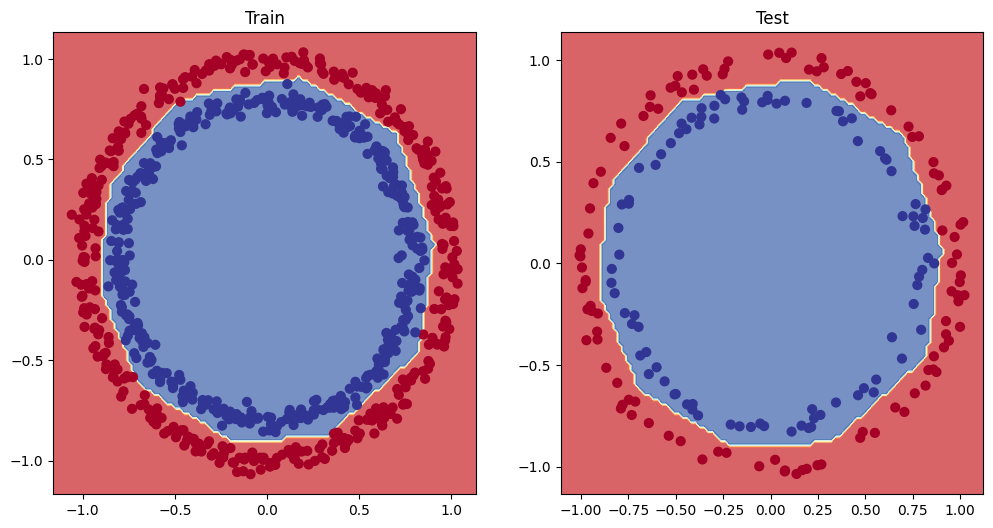

In [16]:
plot_boundaries(model)

In [17]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="binary")

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

accuracy(y_preds, y_test)

tensor(1.)

In [18]:
sample = torch.tensor([[-0.8, -0.5]]) # put any sample. Note size of sample (number, 2)
with torch.inference_mode():
    y_pred = model(sample)
    y_pred = torch.sigmoid(y_pred)
    y_pred = torch.round(y_pred)
    


y_pred

tensor(0.)

# <font color="green">Blob Solver Exercise</font>

# <font color="green">MNist Solver Exercise</font>

# Terminologies & Recap
1. **Activation Function**: A function that decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.


2. **Overfitting**: Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
3. **Underfitting**: Underfitting occurs when a model is too simple to learn the underlying structure of the data.